In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales=pd.read_csv('Sales.csv')

In [4]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [5]:
sales.info()            #-- Their is no null value in our sales dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
sales.shape

(186850, 6)

In [12]:
# Getting the number of missing data per column
missing_values_count = sales.isnull().sum()
print(missing_values_count)
print('Thier are 545 missing value each column have so we have to clean it.')

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
Thier are 545 missing value each column have so we have to clean it.


In [13]:
# drop the row when ALL values are NULL
sales=sales.dropna(how='all') 

In [16]:
sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [17]:
# We have a problem with the data that has text repetition
sales['Quantity Ordered'].unique()

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [18]:
text = sales['Quantity Ordered'] != 'Quantity Ordered'


In [19]:
# Replacing data without text values in quantity ordered
sales = sales[text]

In [20]:
sales['Quantity Ordered'].unique()       # Now the data has no text repetition.

array(['2', '1', '3', '4', '6', '7', '5', '8', '9'], dtype=object)

#Changing 'Quantity Ordered' and 'Price Each' Data Type

In [24]:
# Convert the 'Quantity Ordered' and 'Price Each' data type to numeric data type (int and float)
sales['Quantity Ordered'], sales['Price Each'] = sales['Quantity Ordered'].astype('int32'),sales['Price Each'].astype('float')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.2+ MB


In [26]:
# change to date-time type data

sales['Order Date'] = pd.to_datetime(sales['Order Date']) 
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


# Adding Month, Hour, Minute, Revenue, and City Column

In [27]:
# Create Year, Month, Hour, Minute Column
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month
sales['Hour'] = sales['Order Date'].dt.hour
sales['Minute'] = sales['Order Date'].dt.minute

In [28]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53


# Adding Revenue Column

In [29]:
sales['Revenue'] = sales['Price Each'] * sales['Quantity Ordered']

In [30]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68


In [31]:
# Get City name from 'Purchase Address'
city = sales['Purchase Address'].str.split(", ",expand=True)[1]
city

0               Seattle
1                Dallas
2              Portland
3           Los Angeles
4         New York City
              ...      
186845    San Francisco
186846      Los Angeles
186847          Seattle
186848           Dallas
186849      Los Angeles
Name: 1, Length: 185950, dtype: object

In [33]:
# Create City Column
sales['City'] = city

In [36]:
sales.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City
60933,143688,USB-C Charging Cable,1,11.95,2019-01-18 10:39:00,"969 Sunset St, New York City, NY 10001",2019,1,10,39,11.95,New York City
81946,175266,Bose SoundSport Headphones,1,99.99,2019-03-10 16:24:00,"759 2nd St, New York City, NY 10001",2019,3,16,24,99.99,New York City
135342,266631,Lightning Charging Cable,1,14.95,2019-10-11 10:43:00,"594 Washington St, San Francisco, CA 94016",2019,10,10,43,14.95,San Francisco
156799,218206,Macbook Pro Laptop,1,1700.00,2019-06-28 17:04:00,"258 11th St, Boston, MA 02215",2019,6,17,4,1700.00,Boston
132311,263719,Wired Headphones,1,11.99,2019-10-28 11:44:00,"404 7th St, San Francisco, CA 94016",2019,10,11,44,11.99,San Francisco


In [37]:
# Check number of unique values for each column
n = sales.nunique(axis=0)
  
print("Number of unique values in each column :\n",n)

Number of unique values in each column :
 Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Year                     2
Month                   12
Hour                    24
Minute                  60
Revenue                 54
City                     9
dtype: int64


In [38]:
sales['Year'].unique()

array([2019, 2020], dtype=int64)

In this dataset we also have some of 2020 data, but in this case I only want to analyze the 2019 data. So, we'll drop the 2020 data.

In [39]:
sales = sales[sales.Year != 2020]

In [40]:
sales['Year'].unique()

array([2019], dtype=int64)

# Data Analysis

1] What is the total number of sales?

In [41]:
year_sales = sales.groupby('Year').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Revenue' : 'sum'})
year_sales

,Quantity Ordered,Price Each,Revenue
Year,,,
2019,209038,184.38772,34483365.68


In [42]:
product_sales = sales.groupby('Product').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Revenue' : 'sum'})
print('Quantity Ordered, Price Each, and Revenue By Product')
product_sales

Quantity Ordered, Price Each, and Revenue By Product


,Quantity Ordered,Price Each,Revenue
Product,,,
20in Monitor,4126,109.99,453818.74
27in 4K Gaming Monitor,6243,389.99,2434707.57
27in FHD Monitor,7547,149.99,1131974.53
34in Ultrawide Monitor,6199,379.99,2355558.01
AA Batteries (4-pack),27635,3.84,106118.40
AAA Batteries (4-pack),31012,2.99,92725.88
Apple Airpods Headphones,15657,150.00,2348550.00
Bose SoundSport Headphones,13454,99.99,1345265.46
Flatscreen TV,4818,300.00,1445400.00


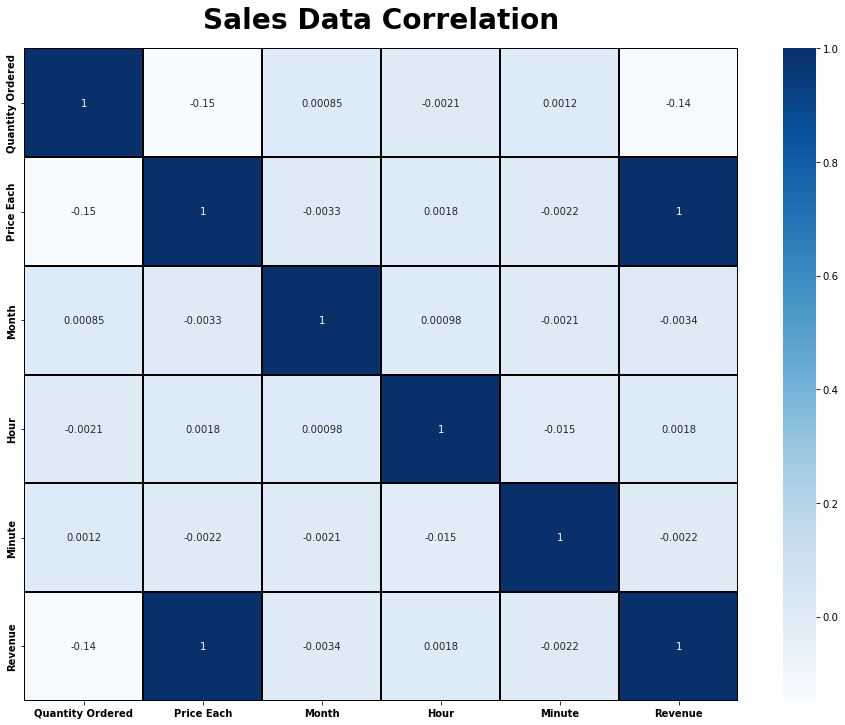

In [43]:
plt.figure(figsize=(16, 12))
sns.heatmap(sales[['Quantity Ordered', 'Price Each', 'Month', 'Hour', 'Minute', 'Revenue']].corr(), 
            annot=True, cmap='Blues',linewidths=0.005, linecolor='Black')

plt.title("Sales Data Correlation", weight="bold", fontsize=28, pad=20) # title
plt.xticks(weight="bold", fontsize=10) # x-ticks
plt.yticks(weight="bold", fontsize=10); # y-ticks

Q2: What was the best Month for sales? How much was earned that Month?

In [46]:
total_month_sales = sales.groupby('Month',as_index=False).agg({'Quantity Ordered':'sum', 'Revenue':'sum'})
print('Total Sales by Month')
total_month_sales

Total Sales by Month


,Month,Quantity Ordered,Revenue
0,1,10862,1813586.44
1,2,13449,2202022.42
2,3,17005,2807100.38
3,4,20558,3390670.24
4,5,18667,3152606.75
5,6,15253,2577802.26
6,7,16072,2647775.76
7,8,13448,2244467.88
8,9,13109,2097560.13
9,10,22703,3736726.88


Text(0.5, 0, 'Month')

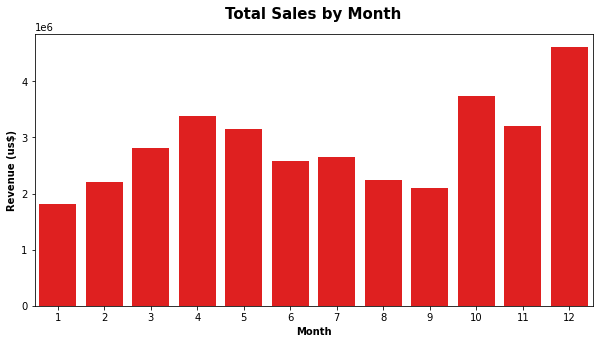

In [50]:
plt.rcParams['figure.figsize']=(10,5)
ay = sns.barplot(x='Month',y='Revenue', data=total_month_sales, color='red')
plt.title('Total Sales by Month', weight='bold', fontsize=15, pad=15)
plt.ylabel('Revenue (us$)', weight='bold')
plt.xlabel('Month', weight='bold')

From the graph above we can tell that December is the best month for sales with USD 4.613.443 total revenue. The reason behind this may be because there's Christmas and the holiday in December where it's the momentum to buy a new product as a gift or for themself.

Q3: What City had the highest number of sales?

In [51]:
city_sales = sales.groupby('City',as_index=False).agg({'Quantity Ordered':'sum', 'Revenue':'sum'})
print('Total Sales by City')
city_sales

Total Sales by City


,City,Quantity Ordered,Revenue
0,Atlanta,16602,2795498.58
1,Austin,11151,1819081.77
2,Boston,22524,3660315.12
3,Dallas,16728,2766260.45
4,Los Angeles,33288,5451570.81
5,New York City,27916,4662976.81
6,Portland,14051,2320337.62
7,San Francisco,50226,8259719.03
8,Seattle,16552,2747605.49


plt.rcParams['figure.figsize']=(10,10)
ax = sns.barplot(x='Revenue',y='City', data=city_sales.sort_values('Revenue', ascending=False))
plt.title('Total Sales by City', weight='bold', fontsize=15, pad=15)
plt.ylabel('City', weight='bold')
plt.xlabel('Revenue (US$)', weight='bold')


San Francisco had the highest total sales in 2019 with USD 8.259.719. We need further information and study about the demographic, economic, and advertising to figure out why San Fransisco had the highest sales compared to other cities in the USA.

Q4: What is the average sales per month?

In [53]:
avg_month_sales = sales.groupby('Month').agg({'Revenue' : 'mean'})
print('Average Sales by Month')
avg_month_sales

Average Sales by Month


,Revenue
Month,
1,187.450795
2,183.884962
3,185.250471
4,185.495390
5,190.305852
6,190.187565
7,185.249826
8,187.648849
9,180.497387


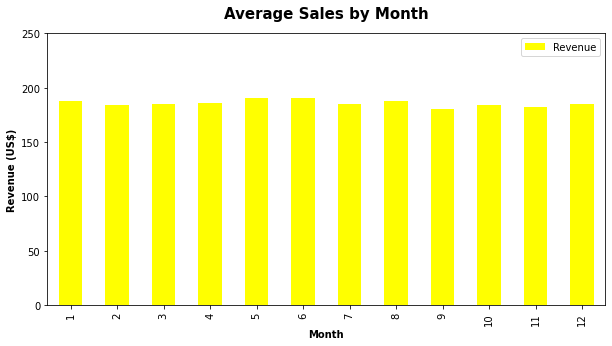

In [54]:
plt.rcParams['figure.figsize']=(10,5)
avg_month_sales.plot(kind='bar', color='yellow')
plt.title('Average Sales by Month', weight='bold', fontsize=15, pad=15)
plt.ylim(0, 250)
plt.ylabel('Revenue (US$)', weight='bold')
plt.xlabel('Month', weight='bold');

In 2019, May has the highest average revenue with USD 190.305852, while September has the lowest average revenue with USD 180.497387.

Q5: What product sold the most? Why it sold the most?

In [55]:
product_sales = sales.groupby('Product',as_index=False).agg({'Quantity Ordered':'sum'}).sort_values('Quantity Ordered', ascending=False)
product_sales

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31012
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23971
12,Lightning Charging Cable,23211
17,Wired Headphones,20553
6,Apple Airpods Headphones,15657
7,Bose SoundSport Headphones,13454
2,27in FHD Monitor,7547
18,iPhone,6847
1,27in 4K Gaming Monitor,6243


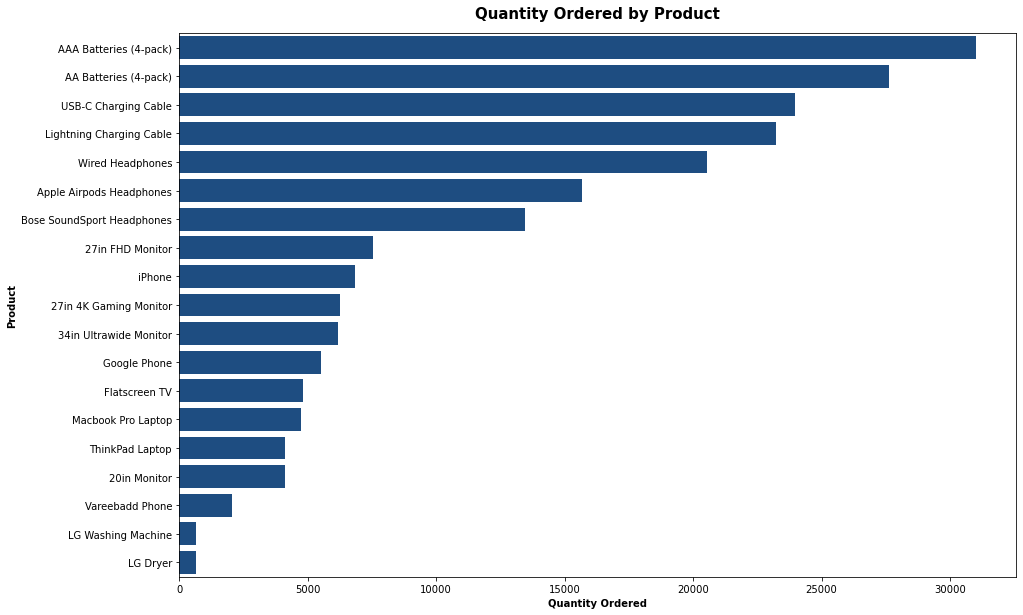

In [56]:
plt.rcParams['figure.figsize']=(15,10)
q5 = sns.barplot(x='Quantity Ordered',y='Product', data=product_sales.sort_values('Quantity Ordered', ascending=False), 
                 color='#0D4C92')
plt.title('Quantity Ordered by Product', weight='bold', fontsize=15, pad=15)
plt.xlabel('Quantity Ordered', weight='bold')
plt.ylabel('Product', weight='bold');

 - Q6] What products are most often sold together?

In [57]:
#Importing libraries to count combination products
from itertools import combinations
from collections import Counter

In [58]:
# Dropping duplicate values of 'Order ID' using duplicated() function
data = sales[sales['Order ID'].duplicated(keep=False)]
# Joining product ordered with the same 'Order ID' in the new column called 'Bundle'
data['Bundle'] = sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

pd.set_option('mode.chained_assignment', None)
# This will stop showing the warning 


C:\Users\dell\AppData\Local\Temp\ipykernel_16332\103501751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bundle'] = sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [59]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City,Bundle
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",2019,8,20,12,7.68,San Francisco,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",2019,8,20,12,11.95,San Francisco,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",2019,8,9,28,700.00,San Francisco,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",2019,8,9,28,150.00,San Francisco,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",2019,8,10,17,600.00,New York City,"Google Phone,Wired Headphones"


- We've got some data with the same Order ID and Bundle because we did merge them in every situation in groupby without dropping the duplicate values. So, we have to drop the rows with duplicate Order ID and Bundle values.

In [60]:
# Dropping duplicate values
data = data[['Order ID', 'Bundle']].drop_duplicates()
# Creating a new variable for Counter
count = Counter()
# Creating a loop to count all the 2 product bundles.
for row in data['Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# Creating another loop to display the 10 most often products that sold together.
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


- We can see the most often products that sold together are iPhone and Lightning Charging Cable with 1004 transactions. Google Phone and USB-C Charging Cable came second with 987 transactions.

- With this information we could offer a smart deal bundle to the customer that buys iPhone, we could recommend the Lightning Charging Cable with a discount. We also can bundle the remaining products with good marketing strategies.

# Conclusion

- The total sales in 2019 were USD 34.483.365 with 209.038 products sold.
- May has the highest average revenue with USD 190.305852, while September has the lowest average revenue with USD 180.497387.
- December is the best month for sales with USD 4.613.443 total revenue.
- San Francisco had the highest total sales in 2019 with USD 8.259.719 total revenue.
- AAA Batteries (4-pack) are the most sold product with 31.012 products ordered.
- iPhone and Lightning Charging Cable are the most often products sold together with 1004 transactions, Google Phone and USB-C Charging Cable came second with 987 transactions.